# ANÁLISIS PREDICTIVO SOBRE LA DIABETES

In [191]:
#Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib
import os


In [192]:
# Paso 1: Preparar los datos de entrenamiento
df = pd.read_csv('home/Diabetes_Entero.csv')

In [193]:
# Paso 2: Convertir salida a binario
df['Outcome'] = df['Outcome'].map({'diabetes': 1, 'no_diabetes': 0})

In [194]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0            2      138             62             35        0  336   
1            0       84             82             31      125  382   
2            0      145              0              0        0  442   
3            0      135             68             42      250  423   
4            1      139             62             41      480  407   

   DiabetesPedigreeFunction  Age  Outcome  
0                       127   47        1  
1                       233   23        0  
2                        63   31        1  
3                       365   24        1  
4                       536   21        0  


In [195]:
# Paso 3: Se seleccionan las variables independientes y dependiente
X = df.iloc[:, :-1]
Y = df['Outcome']

In [196]:
print(X)
print(Y)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0               2      138             62             35        0  336   
1               0       84             82             31      125  382   
2               0      145              0              0        0  442   
3               0      135             68             42      250  423   
4               1      139             62             41      480  407   
...           ...      ...            ...            ...      ...  ...   
1995            2       75             64             24       55  297   
1996            8      179             72             42      130  327   
1997            6       85             78              0        0  312   
1998            0      129            110             46      130  671   
1999            2       81             72             15       76  301   

      DiabetesPedigreeFunction  Age  
0                          127   47  
1                          233   23

In [197]:
# Se imprimen a modo de traza las filas y columnas que hay en la variable dependiente e independiente.

print("Forma de X:", X.shape)
print("Forma de y:", Y.shape)

Forma de X: (2000, 8)
Forma de y: (2000,)


## Se realiza un análisis exploratorio sobre 2 variables dependientes a modo de ejemplo: glucosa y presion arterial

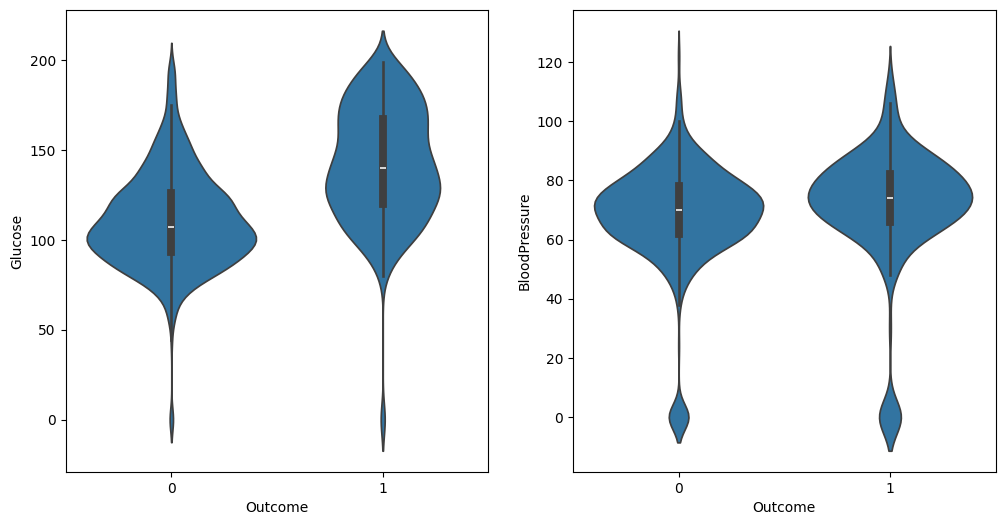

In [198]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.violinplot(ax=axes[0], x='Outcome', y='Glucose', data=df)
sns.violinplot(ax=axes[1], x='Outcome', y='BloodPressure', data=df)
plt.show()

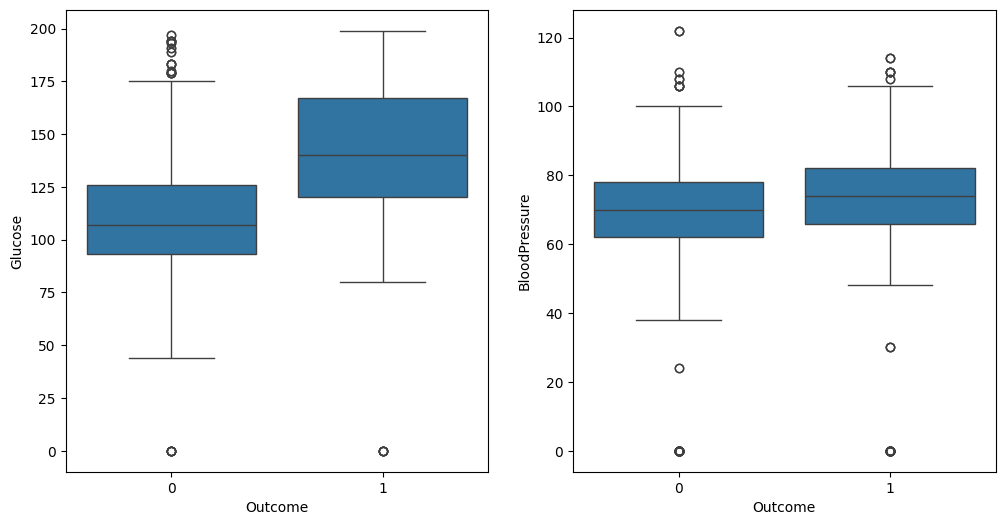

In [199]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(ax=axes[0], x='Outcome', y='Glucose', data=df)
sns.boxplot(ax=axes[1], x='Outcome', y='BloodPressure', data=df)
plt.show()

## Preprocesado de datos
Se limpian algunas filas que contienen datos que no son lógicos (p. ej. presion arterial < 10 y > 200; glucosa < 20 y > 600) 

In [200]:
df_limpio = df[
    (df['BloodPressure'].between(10, 200)) & 
    (df['Glucose'].between(20, 600))
]

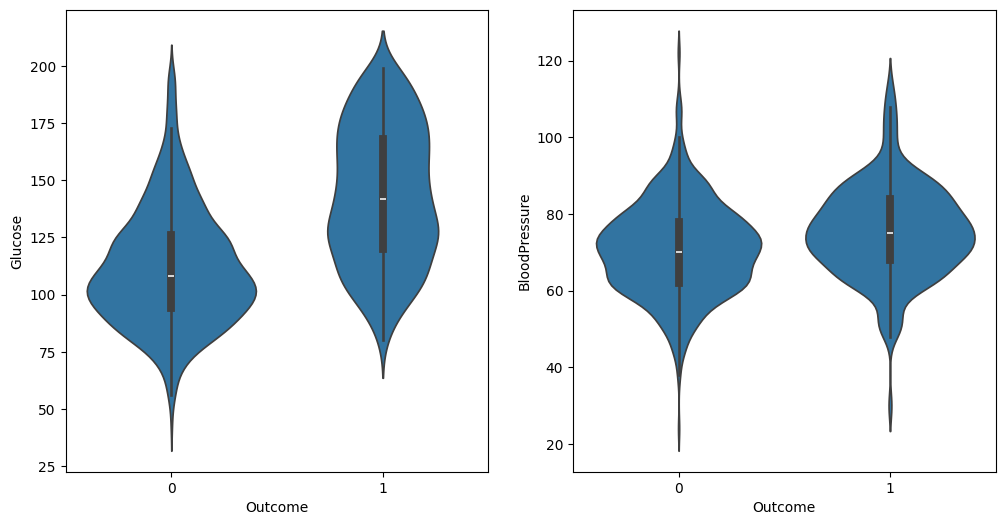

In [201]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.violinplot(ax=axes[0], x='Outcome', y='Glucose', data=df_limpio)
sns.violinplot(ax=axes[1], x='Outcome', y='BloodPressure', data=df_limpio)
plt.show()

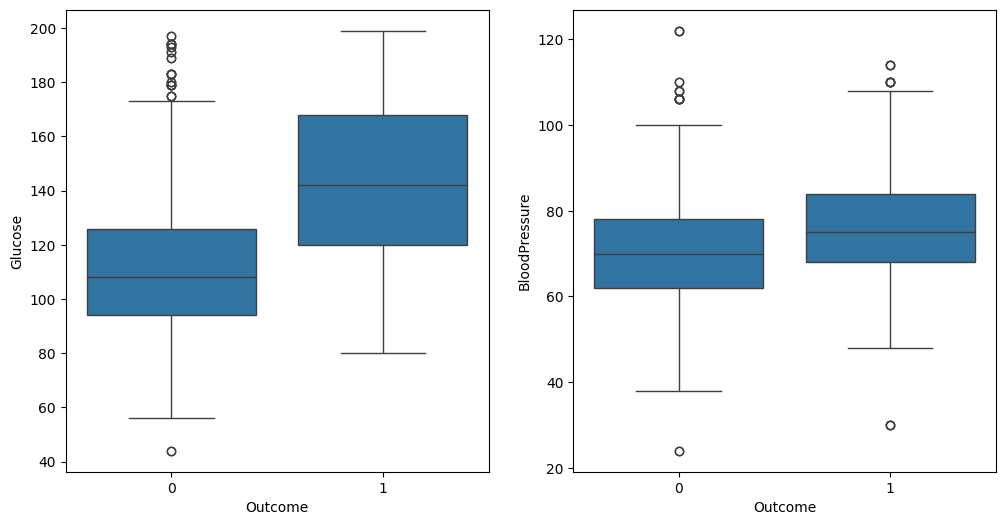

In [202]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(ax=axes[0], x='Outcome', y='Glucose', data=df_limpio)
sns.boxplot(ax=axes[1], x='Outcome', y='BloodPressure', data=df_limpio)
plt.show()

In [203]:
X = df_limpio[['Glucose', 'BloodPressure']]
Y = df_limpio['Outcome']

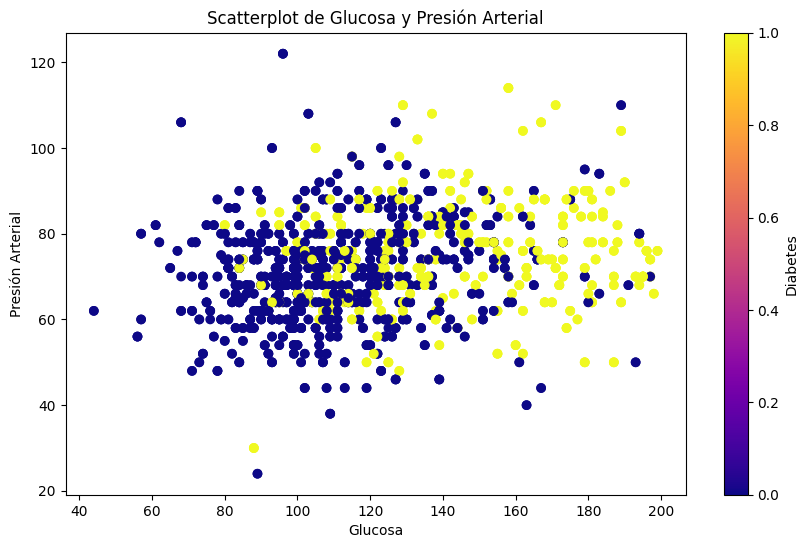

In [204]:
# Scatterplot. Relacion entre 2 variables dependientes
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X['Glucose'], X['BloodPressure'], c=Y, cmap='plasma')

plt.colorbar(scatter, label='Diabetes')

plt.xlabel('Glucosa')
plt.ylabel('Presión Arterial')
plt.title('Scatterplot de Glucosa y Presión Arterial')

plt.show()

**No se aprecia correlacion**

In [205]:
# Se separan los datos en un conjunto de entrenamiento y otro de test
# El tamaño del conjunto de test es de un 20%
# El random_state hace que se cojan unos datos aleatorios u otros
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [206]:
# Paso 4: Estandarizar los datos
# En el caso del conjunto de test, se utiliza transform para no recalcular de nuevo la media
# y desviacion estandar basandose en los datos del test.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [207]:
# Paso 5: Crear el modelo de regresión lineal y entrenarlo
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, Y_train)

RandomForestClassifier(random_state=42)

In [208]:
# Paso 6: Hacer predicciones
Y_pred = model.predict(X_test_scaled)
Y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

Text(0, 0.5, 'Verdaderos')

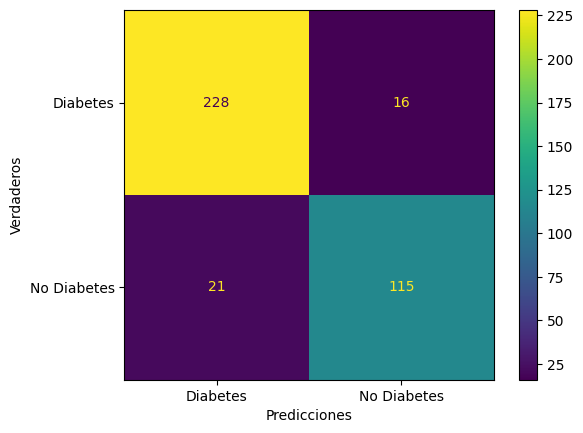

In [209]:
# Visualizacion de la matriz de confusion

cm = confusion_matrix(Y_test, Y_pred)
labels = ['Diabetes', 'No Diabetes']
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

plt.xlabel('Predicciones')
plt.ylabel('Verdaderos')

In [210]:
# Evaluacion del modelo con sklearn
# roc_auc --> capacidad del modelo para distinguir entre clases positivas y negativas. interesa que sea cercano a 1 para no tener falsas predicciones
accuracy = accuracy_score(Y_test, Y_pred) # Exactitud: predicciones correctas sobre el total de casos --> true / all
precision = precision_score(Y_test, Y_pred) # Precision: true_p / all_p 
recall = recall_score(Y_test, Y_pred) # Sensibilidad: true_p / p_reales (TP + FN) Grandes consecuencias --> baja sensibilidad --> se falla en cantidad de pacientes enfermos no tratados.
roc_auc = roc_auc_score(Y_test, Y_pred)  

print(f'Accuracy: {accuracy} casos acertados')
print(f'Precision: {precision} positivos predecidos acertados')
print(f'Recall: {recall} positivos reales acertados')
print(f'ROC AUC Score: {roc_auc}')

Accuracy: 0.9026315789473685 casos acertados
Precision: 0.8778625954198473 positivos predecidos acertados
Recall: 0.8455882352941176 positivos reales acertados
ROC AUC Score: 0.8900072324011573


In [211]:
precisiones = {}
for umbral in [0.1, 0.3, 0.5, 0.7,0.9]:
    yumb = 1*(Y_pred_proba > umbral)
    precisiones[umbral] = precision_score(Y_test, yumb)
precisiones

{0.1: 0.6446700507614214,
 0.3: 0.7908496732026143,
 0.5: 0.8778625954198473,
 0.7: 0.9468085106382979,
 0.9: 1.0}

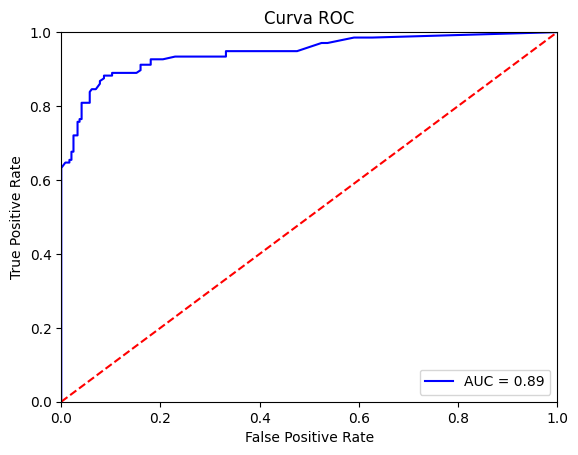

In [212]:
# Curva ROC
# fpr --> tasa de falsos positivos
#tpr --> tasa de verdaderos positivos

fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('Curva ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

El valor del auc es menor a 0.9, por lo que es necesario reentrenar el modelo

      Pregnancies  Glucose  SkinThickness  Insulin  BMI  \
0               2      138             35        0  336   
1               0       84             31      125  382   
3               0      135             42      250  423   
4               1      139             41      480  407   
5               0      173             32      265  465   
...           ...      ...            ...      ...  ...   
1995            2       75             24       55  297   
1996            8      179             42      130  327   
1997            6       85              0        0  312   
1998            0      129             46      130  671   
1999            2       81             15       76  301   

      DiabetesPedigreeFunction  Age  
0                          127   47  
1                          233   23  
3                          365   24  
4                          536   21  
5                     

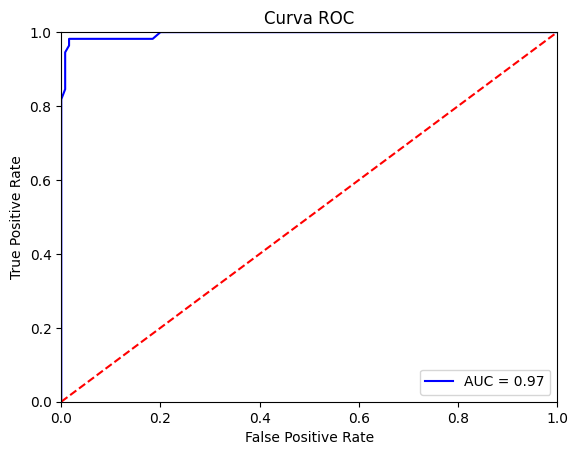

In [213]:
# if(roc_auc >= 0,9 guardar) #else (volver a entrenar)
if(roc_auc >= 0.9):
    model_path = 'home/'
    os.makedirs(model_path, exist_ok=True)
    joblib.dump(model, os.path.join(model_path, 'randomforest_model.pkl'))
    print("Modelo entrenado y guardado de forma satisfactoria\n")
else:
    print("El valor del auc es menor a 0.9, por lo que es necesario reentrenar el modelo\n")
    df2 = df_limpio.drop(columns=['BloodPressure'])
    df_limpio2 = df2[(df2['Pregnancies'].between(0,10))]
    X = df_limpio2.iloc[:, :-1]
    Y = df_limpio2['Outcome']
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    print(X)
    print(Y)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_scaled, Y_train)
    
    Y_pred = model.predict(X_test_scaled)
    Y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    accuracy = accuracy_score(Y_test, Y_pred) # Exactitud: predicciones correctas sobre el total de casos --> true / all
    precision = precision_score(Y_test, Y_pred) # Precision: true_p / all_p 
    recall = recall_score(Y_test, Y_pred) # Sensibilidad: true_p / p_reales (TP + FN) Grandes consecuencias --> baja sensibilidad --> se falla en cantidad de pacientes enfermos no tratados.
    roc_auc = roc_auc_score(Y_test, Y_pred)  

    print(f'Accuracy: {accuracy} casos acertados')
    print(f'Precision: {precision} positivos predecidos acertados')
    print(f'Recall: {recall} positivos reales acertados')
    print(f'ROC AUC Score: {roc_auc}')

    precisiones = {}
    for umbral in [0.1, 0.3, 0.5, 0.7,0.9]:
        yumb = 1*(Y_pred_proba > umbral)
        precisiones[umbral] = precision_score(Y_test, yumb)
    precisiones

    # Curva ROC
    # fpr --> tasa de falsos positivos
    # tpr --> tasa de verdaderos positivos

    fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)

    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.title('Curva ROC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
    if(roc_auc >= 0.9):
        model_path = 'home/'
        os.makedirs(model_path, exist_ok=True)
        joblib.dump(model, os.path.join(model_path, 'randomforest_model.pkl'))
        print("Modelo entrenado y guardado de forma satisfactoria\n")